# Numpy

Numpy (numerical Python) is good for several tasks that are important in data science applications
- fast array-oriented arithmetic operations
- efficient descriptive statistics and data aggregation
- linear algebra

The basic object in Numpy is the **N-dimensional array**, or `ndarray`. Unlike Python lists or tuples, ndarrays contain objects of the same type. Because of that, ndarrays occupy less space than Python built-in types and allow a much more efficient implementation of array operations.

In [1]:
import numpy as np

In [2]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
type(a)

numpy.ndarray

We can inspect the type of the objects inside a ndarray via the attribute `dtype`.

In [4]:
a.dtype

dtype('int64')

The `dtype` of a ndarray can be re-cast using the method `astype()`.

In [5]:
float_a = a.astype(np.float64)
float_a

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

The ndarray attribute `shape` contains the dimensions on the ndarray. In this case, `a` is a 1-dimensional array.

In [6]:
a.shape

(10,)

ndarray elements can be accessed via the indexing operator. Sections of ndarrays can be selected using *slicing*. 

In [7]:
a[2:9:2]

array([2, 4, 6, 8])

Slicing of ndarrays works similarly to Python lists. However, in Numpy we can assign a constant to a slice.

In [8]:
a[2:5] = 10 # all the slice elements get assigned the same value 10
a

array([ 0,  1, 10, 10, 10,  5,  6,  7,  8,  9])

Unlike Python, the operator `[:]` does not make a copy of the ndarray.

In [9]:
a = np.arange(10)
b = a[:]
b[5] = 10
a

array([ 0,  1,  2,  3,  4, 10,  6,  7,  8,  9])

## Universal functions

In [10]:
a = np.random.randint(10, size=10) # 10 independent draws from the uniform distribution in {0,..,9}
a

array([1, 9, 9, 9, 5, 6, 6, 9, 1, 5])

In [11]:
np.sum(a), np.min(a), np.mean(a), np.max(a)

(60, 1, 6.0, 9)

In [12]:
np.square(a)

array([ 1, 81, 81, 81, 25, 36, 36, 81,  1, 25])

In [13]:
np.cumsum(a)

array([ 1, 10, 19, 28, 33, 39, 45, 54, 55, 60])

In [14]:
v1 = np.random.rand(5) # 5 independent draws from the uniform distribution in [0,1]
v1

array([0.37720688, 0.74164897, 0.04241266, 0.63566003, 0.85246557])

In [15]:
v1.dtype

dtype('float64')

In [16]:
v2 = np.random.randn(5) # 5 independent draws from the normal distribution
v2

array([ 1.03279022,  1.65831533,  0.14033949, -0.68761867, -1.1107688 ])

In [17]:
v3 = 5 + 2*v1 - v2
v3

array([4.72162355, 4.82498261, 4.94448582, 6.95893873, 7.81569994])

In [18]:
b = v1 < v2
b

array([ True,  True,  True, False, False])

In [19]:
b.dtype

dtype('bool')

# Linear Algebra with Numpy

We now view 1-dimensional ndarrays as vectors in $\mathbb{R}^n$.

Numpy uses `@` to denote the *inner product* $u^{\top} v = \sum_{i=1}^n u_i v_i$ between two vectors $u,v\in\mathbb{R}^n$.

In [20]:
x = v1 @ v2
x

0.24143174496608272

## Vector Norms
The norm $\|x\|$ of a vector $x$ measures an abstract notion of length
 
Formally, a norm in $\mathbb{R}^n$ is any function $\|\cdot\| : \mathbb{R}^n \to \mathbb{R}$ such that:
* $\|x\| \geq 0$ for all $x$
* $\|x\| = 0 \Longleftrightarrow x = 0$
* $\|ax\| = |a| \|x\|$ for all $x$
* $\|x + y\| \leq \|x\| + \|y\|$ for all $x$ and $y$ (triangle inequality)

## Examples of norms
* The standard length of a vector is measured by the Euclidean norm
$$ \|x\|_2 := \sqrt{x_1^2 + x_2^2 + \cdots x_n^2}$$

* This is a special case of the $p$-norm for integer $p \ge 1$:
$$ \|x\|_p := \left(|x_1|^p + \cdots + |x_n|^p\right)^{1/p}$$

* For $p\to\infty$ we obtain the infinity norm
$$ \|x\|_\infty := \max_{i=1,\ldots, n} |x_i|$$

Note that, for any vector $x$ and for any two integers $p < q$, $\|x\|_p \ge \|x\|_q$  

A vector $x$ is said to be *normalized* in some norm $\|\cdot\|$ if $\|x\| = 1$

In [21]:
from numpy import linalg as LA
LA.norm(v1) # Euclidean norm

1.3508842578202516

In [22]:
LA.norm(v1, ord=1) # 1-norm

2.649394106170015

In [23]:
LA.norm(v1, ord=np.inf) # infinity norm

0.8524655710905429

We now load some modules to improve the rendering of math.

In [24]:
from sympy import init_printing, Matrix, symbols, Rational
import sympy as sym
from warnings import filterwarnings
init_printing(use_latex = 'mathjax')
filterwarnings('ignore')

The *outer product* $u v^{\top}$ between two vectors $u,v\in\mathbb{R}^n$ is a $n \times n$ **matrix** $M$ with components $M_{i,j} = u_i v_j$.

In [25]:
M = np.outer(v1, v2)
M2 = np.round(M, decimals=2) # rounds the entries of M
Matrix(M2) # pretty printing of M2

⎡0.39  0.63  0.05  -0.26  -0.42⎤
⎢                              ⎥
⎢0.77  1.23  0.1   -0.51  -0.82⎥
⎢                              ⎥
⎢0.04  0.07  0.01  -0.03  -0.05⎥
⎢                              ⎥
⎢0.66  1.05  0.09  -0.44  -0.71⎥
⎢                              ⎥
⎣0.88  1.41  0.12  -0.59  -0.95⎦

Note that `M2` is created as a 2-dimensional ndarray. 

In [26]:
M2

array([[ 0.39,  0.63,  0.05, -0.26, -0.42],
       [ 0.77,  1.23,  0.1 , -0.51, -0.82],
       [ 0.04,  0.07,  0.01, -0.03, -0.05],
       [ 0.66,  1.05,  0.09, -0.44, -0.71],
       [ 0.88,  1.41,  0.12, -0.59, -0.95]])

We can check the dimensions via the `shape` attribute.

In [27]:
M2.shape

(5, 5)

Creating 1-d and 2-d ndarrays using the type constructor.

In [28]:
a = [2, 4, 6, 8, 10]
npa = np.array(a)
npa

array([ 2,  4,  6,  8, 10])

In [29]:
b = [1, 3, 5, 7, 9]
M = np.array([a, b])
Matrix(M)

⎡2  4  6  8  10⎤
⎢              ⎥
⎣1  3  5  7  9 ⎦

In [30]:
M.shape

(2, 5)

Arithmetic operators apply to higher-dimensional ndarrays in much the same way as with 1-d ndarrays.

In [31]:
N = M/2 + 3
Matrix(N)

⎡4.0  5.0  6.0  7.0  8.0⎤
⎢                       ⎥
⎣3.5  4.5  5.5  6.5  7.5⎦

We now describe matrices as linear operators.

In [32]:
a11, a12, a13, a21, a22, a23, a31, a32, a33, b11, b12, b13, b21, b22, b23, b31, b32, b33 = symbols('a11 a12 a13 a21 a22 a23 a31 a32 a33 b11 b12 b13 b21 b22 b23 b31 b32 b33')

In [33]:
A = np.array([[a11, a12, a13], [a21, a22, a23]])
v = np.array([b11, b21, b31])
Matrix(A), Matrix(v)

⎛                 ⎡b₁₁⎤⎞
⎜⎡a₁₁  a₁₂  a₁₃⎤  ⎢   ⎥⎟
⎜⎢             ⎥, ⎢b₂₁⎥⎟
⎜⎣a₂₁  a₂₂  a₂₃⎦  ⎢   ⎥⎟
⎝                 ⎣b₃₁⎦⎠

Note that vectors are **column vectors**.

Let's start with the simple matrix-vector multiplication.

In [34]:
C = np.dot(A, v) # this is an equivalent syntax for A @ v
Matrix(C)

⎡a₁₁⋅b₁₁ + a₁₂⋅b₂₁ + a₁₃⋅b₃₁⎤
⎢                           ⎥
⎣a₂₁⋅b₁₁ + a₂₂⋅b₂₁ + a₂₃⋅b₃₁⎦

Recall that a $m \times n$ matrix $M$ denotes a **linear** operator $T_M : \mathbb{R}^n \to \mathbb{R}^m$ such that $T_M(v) = Mv$. Hence, for all $a\in\mathbb{R}$ and $u,v\in\mathbb{R}^n$, we have $M(av) = a Mv$ and $M(u+v) = Mu + Mv$.

Given two matrices $A$ of size $m \times n$ and $B$ of size $n \times p$, the composition of functions $T_A$ and $T_B$ is obtained trough **matrix multiplication**. Hence $$T_A\big(T_B(v)\big) = ABv$$ for all $v \in \mathbb{R}^p$.

We recall how two matrices are multiplied.

In [35]:
A = np.array([[a11, a12, a13], [a21, a22, a23]])
B = np.array([[b11, b12], [b21, b22], [b31, b32]])
Matrix(A), Matrix(B)

⎛                 ⎡b₁₁  b₁₂⎤⎞
⎜⎡a₁₁  a₁₂  a₁₃⎤  ⎢        ⎥⎟
⎜⎢             ⎥, ⎢b₂₁  b₂₂⎥⎟
⎜⎣a₂₁  a₂₂  a₂₃⎦  ⎢        ⎥⎟
⎝                 ⎣b₃₁  b₃₂⎦⎠

In [36]:
C = np.dot(A, B)
Matrix(C)

⎡a₁₁⋅b₁₁ + a₁₂⋅b₂₁ + a₁₃⋅b₃₁  a₁₁⋅b₁₂ + a₁₂⋅b₂₂ + a₁₃⋅b₃₂⎤
⎢                                                        ⎥
⎣a₂₁⋅b₁₁ + a₂₂⋅b₂₁ + a₂₃⋅b₃₁  a₂₁⋅b₁₂ + a₂₂⋅b₂₂ + a₂₃⋅b₃₂⎦

### Transpose

The transpose of a matrix $A$ with components $A_{i,j}$ is the matrix $A^{\top}$ such that $A^{\top}_{i,j} = A_{j,i}$

Some properties:
* $(A + B)^\top = A^\top + B^\top$
* $(AB)^\top = B^\top A^\top$

In [37]:
Matrix(M), Matrix(M.T)

⎛                  ⎡2   1⎤⎞
⎜                  ⎢     ⎥⎟
⎜                  ⎢4   3⎥⎟
⎜⎡2  4  6  8  10⎤  ⎢     ⎥⎟
⎜⎢              ⎥, ⎢6   5⎥⎟
⎜⎣1  3  5  7  9 ⎦  ⎢     ⎥⎟
⎜                  ⎢8   7⎥⎟
⎜                  ⎢     ⎥⎟
⎝                  ⎣10  9⎦⎠

A generic matrix can be *symmetrized* through multiplication with its transpose

In [38]:
Q = M @ M.T
Matrix(Q)

⎡220  190⎤
⎢        ⎥
⎣190  165⎦

In [39]:
Q = M.T @ M
Matrix(Q)

⎡5   11  17   23   29 ⎤
⎢                     ⎥
⎢11  25  39   53   67 ⎥
⎢                     ⎥
⎢17  39  61   83   105⎥
⎢                     ⎥
⎢23  53  83   113  143⎥
⎢                     ⎥
⎣29  67  105  143  181⎦

### Rank

A set of vectors is linearly independent if no vector in the set can be represented as a linear combination of the others.

The rank of a matrix is the largest number of linearly independent columns or, **equivalently**, the largest number of linearly independent rows. Hence the rank of a $m\times n$ matrix cannot be larger than $\min\{m,n\}$.
    
* the column space of a matrix is the set of all possible linear combinations of its column vectors
* the row space of a matrix is the set of all possible linear combinations of its row vectors

For any matrix $A$, the rank of $A$ $=$ the dimension of the column space of $A$ $=$ dimension of the row space of $A$

In [40]:
v = np.random.randn(5)
M = np.array([v,2*v,5*v])
LA.matrix_rank(M)

1

In [41]:
v = np.random.randn(5)
M = np.outer(v, v)
LA.matrix_rank(M)

1

In [42]:
G = np.random.randn(5,5)
LA.matrix_rank(G)

5

## Matrix inversion
* The inverse $A^{-1}$ of a *square matrix* $A$, if it exists, is the unique matrix such that $A A^{-1} = A^{-1}A = I$. Hence $A^{-1}$ corresponds to the functional inverse $T_A^{-1}$ of the linear operator $T_A$ which satisfies $T_A^{-1}\big(T_A(v)\big) = T_A\big(T_A^{-1}(v)\big) = v$ for all $v$
* A square matrix is invertible if and only if it is full rank
* If $A$ and $B$ are invertible, then $AB$ is invertible and $(AB)^{-1} = B^{-1} A^{-1}$
* If $A$ is invertible, then $A^\top$ is invertible and $(A^\top)^{-1} = (A^{-1})^\top$

In [43]:
X = np.array([[3, 1], [1, 4]])
Matrix(X)

⎡3  1⎤
⎢    ⎥
⎣1  4⎦

In [44]:
LA.matrix_rank(X)

2

In [45]:
Y = LA.inv(X)
Matrix(Y)

⎡ 0.363636363636364   -0.0909090909090909⎤
⎢                                        ⎥
⎣-0.0909090909090909   0.272727272727273 ⎦

In [46]:
Matrix(X @ Y), Matrix(Y @ X)

⎛⎡         1.0           0.0⎤  ⎡        1.0           -1.11022302462516e-16⎤⎞
⎜⎢                          ⎥, ⎢                                           ⎥⎟
⎝⎣-5.55111512312578e-17  1.0⎦  ⎣5.55111512312578e-17           1.0         ⎦⎠

## Orthogonal + Normalized = Orthonormal
* Two vectors $x,y$ are *orthogonal* if $x^{\top} y = 0$
* A square matrix $U \in \mathbb{R}^{n \times n}$ is *orthogonal* if its columns are pairwise orthogonal
* $U$ is *orthonormal* if it is orthogonal **and** the columns are normalized (Euclidean norm $= 1$)
* If $U$ is orthonormal, then $U^\top U = I$, that is, $U^{-1} = U^\top$

## Positive Definiteness
* A symmetric matrix $A$ is positive definite if
$x^\top A x > 0$ for all $x \ne 0$
* A matrix is positive semi-definite (PSD) if 
$x^\top A x \geq 0$ for all $x$
* A positive definite matrix defines a *norm*
$\| x \|_A = \sqrt{x ^\top A x}$

## Eigenvectors and eigenvalues
* Consider square $n \times n$ matrices $A$ that are symmetric. That is, $A_{i,j} = A_{j,i}$ for all $1 \le i,j \le n$.
* If $A u = \lambda u$ for some $\lambda\in\mathbb{R}$ and $u \in \mathbb{R}^n$, then $u$ is an *eigenvector* of $A$ and $\lambda$ is its associated *eigenvalue*.

### Spectral Theorem
* If $A$ is symmetric, then $A = U\Sigma U^{\top}$ where $U$ is an orthonormal matrix whose columns are the eigenvectors of $A$ and $\Sigma$ is a diagonal matrix whose diagonal elements are the eigenvalues of $A$.
* If $A$ is also positive semidefinite, then all the eigenvalues are nonnegative.

Note that $$U\Sigma U^{\top} = \sum_{i=1}^d \lambda_i u_i u_i^{\top}$$ Hence, any positive semidefinite matrix can be written as a sum of outer products of vectors.

We now visualize the effect of a linear operator $T_A$ on a disk in $\mathbb{R}^d$.

In [47]:
M = np.random.randn(2,2)
A = M @ M.T
Matrix(A)

⎡ 1.68435123866934   -0.326409333835371⎤
⎢                                      ⎥
⎣-0.326409333835371  0.210091804230156 ⎦

First, we perform the spectral decomposition of $A$

In [48]:
U, s, Vh = LA.svd(A, full_matrices=True)
U.shape, s.shape, Vh.shape

((2, 2), (2,), (2, 2))

We print $U$ and the diagonal matrix $\Sigma$

In [49]:
Matrix(U), Matrix(np.diag(s))

⎛⎡-0.978357021843172  0.206923990417153⎤  ⎡1.75338730664724         0.0       
⎜⎢                                     ⎥, ⎢                                   
⎝⎣0.206923990417153   0.978357021843172⎦  ⎣      0.0         0.141055736252257

⎤⎞
⎥⎟
⎦⎠

We verify the spectral theorem by recovering the original matrix through its spectral decomposition

In [50]:
Matrix(U @ np.diag(s) @ U.T)

⎡ 1.68435123866934   -0.326409333835371⎤
⎢                                      ⎥
⎣-0.326409333835371  0.210091804230156 ⎦

We now visualize how the points on a disk get distorted through the application of $A$

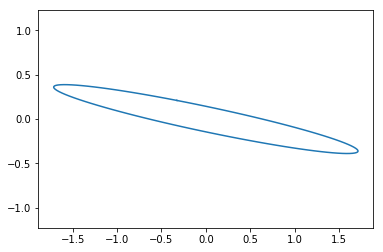

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
theta = np.linspace(0, 2*np.pi, 100) # return evenly spaced numbers over a specified interval
x = np.sin(theta)
y = np.cos(theta)
v = np.array([x, y]) # create 2 x 100 matrix
z = A @ v
plt.axes().set_aspect('equal', 'datalim')
plt.plot(z[0], z[1]);
plt.show()

We a bit more effort, we can print the eigenvectors scaled by their eigenvalues. This reveals the geometric role of the spectrum

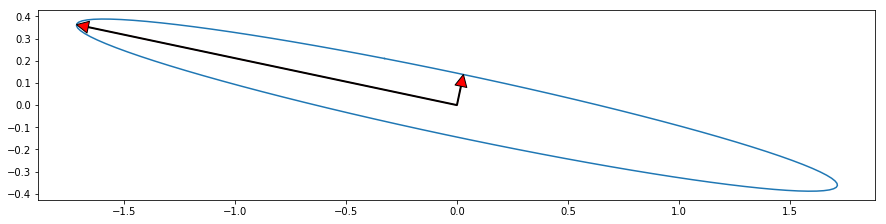

In [52]:
theta = np.linspace(0, 2*np.pi, 100)
x = np.sin(theta)
y = np.cos(theta)
z = A @ np.array([x, y])
start = np.array([0.0, 0.0])

fig, ax = plt.subplots()
fig.set_size_inches(15,15)
plt.plot(z[0], z[1]);

end = s[0] * U[:,0]
ax.annotate(
    '', xy=end, xycoords='data',
    xytext=start, textcoords='data',
    arrowprops=dict(facecolor='red', width=1.0))

end = s[1] * U[:,1]
ax.annotate(
    '', xy=end, xycoords='data',
    xytext=start, textcoords='data',
    arrowprops=dict(facecolor='red', width=1.0))

ax.set_aspect('equal')
plt.show()